# **YOLOV11 Implementation on Custom Dataset**

Change the runtime of google collab from cpu tro gpu t4 or any other available GPU

runtime > change runtime type > select GPU > Save

Load the dependencies

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 53.7 MB/s eta 0:00:00


Download the Vehicle number plate dataset from kaggle

https://www.kaggle.com/datasets/inspiring-lab/nepali-vehicles-number-plate-dataset

Load the dataset

We can either upload the dataset manually or add it in the google drive and access via there

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Unzip Dataset



In [2]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: open_source_nepali_plates/images/2021-03-23_07_05_55.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_06_49.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_14_40.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_27_32.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_32_55.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_35_53.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_37_06.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_42_19.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_48_23.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_50_01.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_50_33.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_52_51.jpg  
  inflating: open_source_nepali_plates/images/2021-03-23_07_57_45.jpg  
  inflating: 

Split the dataset

In [3]:


import os
import shutil
import random

# Set the source folders for images and labels

image_source_folder = "/content/open_source_nepali_plates/images"
label_source_folder = "/content/open_source_nepali_plates/labels"

# Set the destination folders for training and testing
train_image_folder = "/content/split_dataset/train/images"
train_label_folder = "/content/split_dataset/train/labels"
test_image_folder = "/content/split_dataset/test/images"
test_label_folder = "/content/split_dataset/test/labels"

import os
import random
import shutil

# Define the split ratio (e.g., 80% for training, 20% for testing)
split_ratio = 0.8

# Create destination folders if they don't exist
os.makedirs(train_image_folder, exist_ok=True)
os.makedirs(train_label_folder, exist_ok=True)
os.makedirs(test_image_folder, exist_ok=True)
os.makedirs(test_label_folder, exist_ok=True)

# List all image files in the source folder
image_files = os.listdir(image_source_folder)

# Randomly shuffle the image files
random.shuffle(image_files)

# Calculate the number of images for training and testing
split_index = int(len(image_files) * split_ratio)

# Split the image files into training and testing
train_images = image_files[:split_index]
test_images = image_files[split_index:]

# Move the training image and label pairs to their respective folders
for image in train_images:
    label = image.replace(".jpg", ".txt").replace(".png", ".txt")
    label_path = os.path.join(label_source_folder, label)

    if os.path.exists(label_path):
        shutil.move(os.path.join(image_source_folder, image), os.path.join(train_image_folder, image))
        shutil.move(label_path, os.path.join(train_label_folder, label))

# Move the testing image and label pairs to their respective folders
for image in test_images:
    label = image.replace(".jpg", ".txt").replace(".png", ".txt")
    label_path = os.path.join(label_source_folder, label)

    if os.path.exists(label_path):
        shutil.move(os.path.join(image_source_folder, image), os.path.join(test_image_folder, image))
        shutil.move(label_path, os.path.join(test_label_folder, label))

print("Dataset split into training and testing sets with matching image and label pairs.")





Dataset split into training and testing sets with matching image and label pairs.


Create custom.yaml and add the following code into the file

train: /content/split_dataset/train

val: /content/split_dataset/test

nc: 1

names: [character]

Train on yolov11

In [4]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO("yolo11n.yaml")

#Train the model with our custom dataset for 50 epochs
results = model.train(data="/content/custom.yaml", epochs=50, batch=64, imgsz=256)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=/content/custom.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300,

100%|██████████| 755k/755k [00:00<00:00, 96.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 179MB/s]


AMP: checks passed ✅


train: Scanning /content/split_dataset/train/labels... 2002 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2002/2002 [00:00<00:00, 2075.04it/s]

train: New cache created: /content/split_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/split_dataset/test/labels... 501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<00:00, 1157.55it/s]


val: New cache created: /content/split_dataset/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.67G      5.486      3.364      3.828        290        256: 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

                   all        501       3844          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.63G      2.986      1.614      2.256        274        256: 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        501       3844          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.6G       1.87     0.9954      1.499        283        256: 100%|██████████| 32/32 [00:10<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        501       3844      0.899       0.51      0.706       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.59G      1.511     0.8062      1.269        313        256: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        501       3844      0.908      0.869      0.931      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.55G       1.36     0.7204      1.186        302        256: 100%|██████████| 32/32 [00:10<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        501       3844      0.933      0.924      0.967      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.56G      1.263     0.6759      1.137        281        256: 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all        501       3844      0.945      0.936       0.97       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.59G        1.2     0.6364      1.097        292        256: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        501       3844      0.951      0.943      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.6G      1.132     0.5991      1.066        263        256: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        501       3844      0.953       0.95      0.977      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.6G      1.132     0.5899      1.059        248        256: 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        501       3844      0.958      0.958      0.982      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.6G      1.092     0.5723      1.044        306        256: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        501       3844      0.947      0.949      0.981       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.59G      1.047     0.5505      1.023        257        256: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        501       3844      0.956      0.963      0.983      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.57G      1.008     0.5307      1.012        313        256: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        501       3844      0.955      0.957      0.986      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.55G      1.028     0.5395      1.014        259        256: 100%|██████████| 32/32 [00:08<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        501       3844      0.956      0.965      0.983      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.61G     0.9949     0.5209      1.003        254        256: 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        501       3844      0.967      0.958      0.984      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.58G     0.9661     0.5047     0.9884        258        256: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        501       3844      0.956      0.965      0.985      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.55G     0.9351     0.4898     0.9851        286        256: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        501       3844      0.969      0.963      0.988      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.6G     0.9218     0.4853     0.9723        226        256: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        501       3844      0.971      0.965      0.989      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.59G     0.9193      0.482     0.9756        305        256: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        501       3844      0.968       0.97      0.989      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.6G     0.8876     0.4652     0.9611        258        256: 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        501       3844       0.97      0.959      0.989      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.63G     0.9034     0.4668     0.9679        245        256: 100%|██████████| 32/32 [00:09<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        501       3844      0.971      0.968      0.989      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.54G     0.8766     0.4566     0.9589        283        256: 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        501       3844       0.97      0.967      0.989      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.58G     0.8824     0.4582     0.9617        273        256: 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        501       3844      0.969      0.971      0.991      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.56G     0.8759     0.4537     0.9602        275        256: 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        501       3844      0.969      0.973      0.991      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.62G     0.8685      0.453     0.9602        219        256: 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        501       3844       0.97       0.97       0.99      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.58G     0.8631     0.4469     0.9506        233        256: 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        501       3844      0.976      0.968      0.989      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.64G     0.8473     0.4346     0.9505        322        256: 100%|██████████| 32/32 [00:09<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        501       3844       0.97      0.972       0.99      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.54G     0.8382      0.431     0.9483        314        256: 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        501       3844      0.969      0.975       0.99       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.64G     0.8384     0.4283      0.943        290        256: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        501       3844      0.978      0.972      0.992       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.54G     0.8255     0.4235     0.9432        315        256: 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        501       3844       0.98      0.965      0.991      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.54G     0.8249     0.4225     0.9384        277        256: 100%|██████████| 32/32 [00:08<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        501       3844      0.975      0.972      0.991      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.59G      0.813     0.4164     0.9406        294        256: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        501       3844      0.976      0.972      0.991      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.56G     0.8204     0.4169     0.9418        316        256: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        501       3844      0.978      0.972      0.991      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.56G       0.81     0.4118     0.9364        247        256: 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        501       3844      0.974      0.973      0.991      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.59G     0.8033     0.4083     0.9325        231        256: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        501       3844      0.975      0.972      0.991      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.6G     0.7963     0.4039     0.9314        279        256: 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        501       3844      0.981       0.97      0.992      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.63G     0.7984     0.4048     0.9297        275        256: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        501       3844      0.975      0.974      0.991      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.6G     0.7888     0.4021     0.9277        283        256: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        501       3844      0.974      0.979      0.991      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.55G     0.7897     0.3992     0.9307        298        256: 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        501       3844      0.974      0.976      0.992      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.59G     0.7974     0.3997     0.9347        235        256: 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        501       3844      0.979      0.973      0.992      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.58G     0.7796      0.393     0.9277        293        256: 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        501       3844      0.977      0.976      0.992      0.833


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.52G     0.7655     0.4072     0.9322        138        256: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        501       3844      0.975      0.975      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.52G     0.7342     0.3721     0.9258        137        256: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        501       3844      0.976      0.978      0.991      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.52G     0.7246     0.3639     0.9231        142        256: 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        501       3844      0.977      0.977      0.992      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.52G     0.7178     0.3598     0.9184        131        256: 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        501       3844      0.979      0.976      0.992      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.52G     0.7217     0.3581     0.9204        139        256: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        501       3844      0.981      0.977      0.992      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.52G     0.7122     0.3562     0.9184        140        256: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        501       3844      0.979       0.98      0.992      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.52G     0.7097     0.3517     0.9162        141        256: 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        501       3844       0.98      0.978      0.992      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.52G     0.7043     0.3501     0.9149        140        256: 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        501       3844       0.98      0.979      0.992      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.52G     0.7055     0.3477     0.9159        149        256: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        501       3844      0.981      0.977      0.992      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.52G     0.6972      0.346     0.9136        144        256: 100%|██████████| 32/32 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        501       3844       0.98      0.978      0.992      0.834



50 epochs completed in 0.187 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


                   all        501       3844       0.98      0.978      0.992      0.834
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


Inference with the trained model


0: 128x256 8 characters, 8.9ms
Speed: 0.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 128, 256)
Results saved to runs/detect/predict4


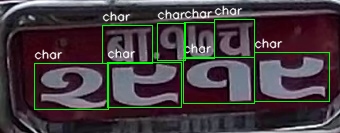

In [8]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
# Create a new YOLO model from scratch
model = YOLO("/content/runs/detect/train/weights/best.pt")


image = cv2.imread("/content/plate.jpg")
# Perform object detection on an image using the model

results = model.predict(image, save=True, imgsz=256, conf=0.5)

# Extract bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Bounding box coordinates

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)  # Green box

        # Draw label "char" on top of the bounding box
        label = "char"
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, label, (x1, y1 - 5), font, 0.4, (255, 255, 255), 1, cv2.LINE_AA)  # White text

# Display the image with bounding boxes and "app" label
cv2_imshow(image)



Convert to Onnx if needed to run the model in runtime

In [9]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO("/content/runs/detect/train/weights/best.pt")

#
# Export the model to ONNX format
success = model.export(format="onnx")

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 256, 256) BCHW and output shape(s) (1, 5, 1344) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 161.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 228.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 206.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 244.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 242.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun comman